In [1]:
# Data Reading
import pandas as pd
df=pd.read_excel('Online retail.xlsx')

df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [2]:
df.shape

(7500, 1)

In [3]:
# Generate transactions
transactions = []
for i in range(len(df)):
    transactions.append([str(item) for item in df.iloc[i, 0].split(',')])

# Remove unnecessary first transaction (header)
transactions = transactions[1:]

# Display number of transactions
print("Number of transactions:", len(transactions))

Number of transactions: 7499


In [4]:


from apyori import apriori
rules = apriori(transactions = transactions, 
                min_support = 0.003, 
                min_confidence = 0.2, 
                min_lift = 3, 
                min_length = 2, 
                max_length = 2)

report = list(rules)
len(report)

report




[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004533937858381117, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.842659069325735)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005734097879717296, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7898219427631195)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005867448993199093, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.37288135593220345, lift=4.6995584674547795)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.0033337778370449394, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confid

In [5]:

# report[0]
# report[0][1] # support
# report[0][2][0][0] # base item
# report[0][2][0][1] # add item
# report[0][2][0][2] # confidence


a=[]
b=[]
c=[]
d=[]
e = []

for i in range(0,9):
    a.append(report[i][1]) # support
    b.append(report[i][2][0][0]) # base item
    c.append(report[i][2][0][1]) # add item
    d.append(report[i][2][0][2]) # confidence
    e.append(report[i][2][0][3]) # lift
    
df_new  = pd.concat([pd.DataFrame(a),
          pd.DataFrame(b),
          pd.DataFrame(c),
          pd.DataFrame(d),
          pd.DataFrame(e)],axis=1)

df_new.columns = ['Support','baseitem','add item','confidence','lift']
df_new


,Support,baseitem,add item,confidence,lift
0,0.004534,light cream,chicken,0.290598,4.842659
1,0.005734,mushroom cream sauce,escalope,0.300699,3.789822
2,0.005867,pasta,escalope,0.372881,4.699558
3,0.003334,fromage blanc,honey,0.245098,5.177437
4,0.016002,herb & pepper,ground beef,0.323450,3.291116
5,0.005334,tomato sauce,ground beef,0.377358,3.839635
6,0.003200,light cream,olive oil,0.205128,3.120196
7,0.008001,whole wheat pasta,olive oil,0.271493,4.129671
8,0.005067,pasta,shrimp,0.322034,4.513892


array([[<Axes: title={'center': 'Support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

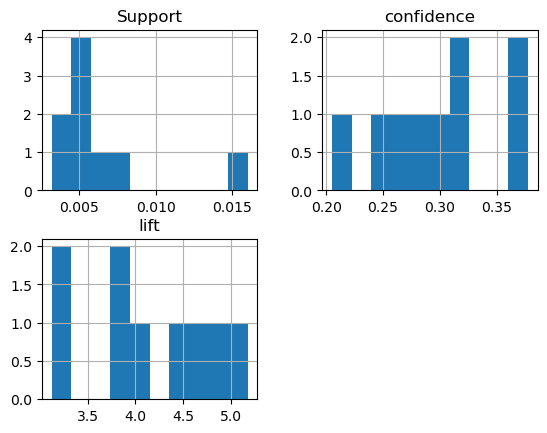

In [6]:
df_new.hist()

In [8]:
df_new

,Support,baseitem,add item,confidence,lift
0,0.004534,light cream,chicken,0.290598,4.842659
1,0.005734,mushroom cream sauce,escalope,0.300699,3.789822
2,0.005867,pasta,escalope,0.372881,4.699558
3,0.003334,fromage blanc,honey,0.245098,5.177437
4,0.016002,herb & pepper,ground beef,0.323450,3.291116
5,0.005334,tomato sauce,ground beef,0.377358,3.839635
6,0.003200,light cream,olive oil,0.205128,3.120196
7,0.008001,whole wheat pasta,olive oil,0.271493,4.129671
8,0.005067,pasta,shrimp,0.322034,4.513892
